In [1]:
from nltk.corpus import movie_reviews
fileids=movie_reviews.fileids()

reviews=[movie_reviews.raw(fileid) for fileid in fileids]

categories=[movie_reviews.categories(fileid)[0] for fileid in fileids]

print('Reviews count: ', len(reviews))
print('Length of the first review', len(reviews[0]))
print('Labels: ', set(categories))

Reviews count:  2000
Length of the first review 4043
Labels:  {'pos', 'neg'}


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words=1000

tokenizer=Tokenizer(num_words=max_words, oov_token='UNK')

tokenizer.fit_on_texts(reviews)

X=tokenizer.texts_to_sequences(reviews)

print('Length of first 10 documents: ', [len(doc) for doc in X[:10]])

C:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Length of first 10 documents:  [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [3]:
print("Index of 'the': ", tokenizer.word_index["the"])
print("Index of 'review': ", tokenizer.word_index["review"])
print("Index of out-of-vocabulary words: ", tokenizer.word_index["UNK"])

Index of 'the':  2
Index of 'review':  466
Index of out-of-vocabulary words:  1


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=500

X=pad_sequences(X, maxlen=maxlen, truncating='pre')

In [5]:
label_dict={'pos':1, 'neg':0}
y=np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))
print('Test samples: ', y_test[:20])

Train set count:  1600
Test set count:  400
Test samples:  [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model=Sequential([Embedding(max_words, 32, input_length=maxlen),Flatten(), Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 48001 (187.50 KB)
Trainable params: 48001 (187.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 2s 21ms/step - loss: 0.6928 - acc: 0.5055 - val_loss: 0.6903 - val_acc: 0.5281
Epoch 2/10
40/40 [==============================] - 0s 11ms/step - loss: 0.6328 - acc: 0.7922 - val_loss: 0.6880 - val_acc: 0.5312
Epoch 3/10
40/40 [==============================] - 0s 11ms/step - loss: 0.5531 - acc: 0.9242 - val_loss: 0.6835 - val_acc: 0.5500
Epoch 4/10
40/40 [==============================] - 0s 10ms/step - loss: 0.4513 - acc: 0.9688 - val_loss: 0.6776 - val_acc: 0.5469
Epoch 5/10
40/40 [==============================] - 0s 11ms/step - loss: 0.3446 - acc: 0.9805 - val_loss: 0.6713 - val_acc: 0.5656
Epoch 6/10
40/40 [==============================] - 0s 11ms/step - loss: 0.2478 - acc: 0.9914 - val_loss: 0.6818 - val_acc: 0.5688
Epoch 7/10
40/40 [==============================] - 0s 11ms/step - loss: 0.1703 - acc: 0.9984 - val_loss: 0.6764 - val_acc: 0.5813
Epoch 8/10
40/40 [==============================] - 0s 11ms/step - loss: 0.1115 - a

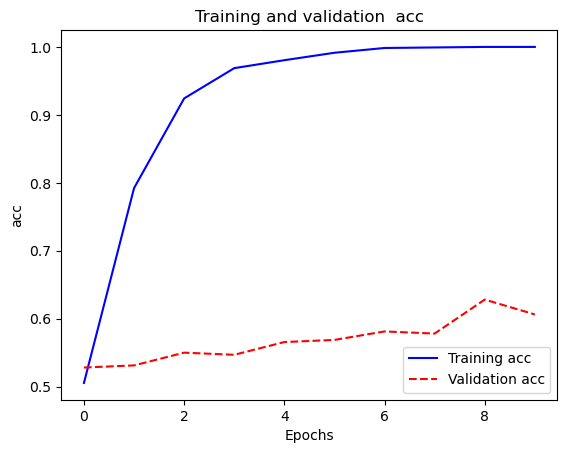

In [11]:
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training and validation  '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
    
plot_results(history, 'acc')

In [12]:
score=model.evaluate(X_test, y_test)
print(f'#Test accuracy: {score[1]:.3f}')

13/13 [==============================] - 0s 6ms/step - loss: 0.7195 - acc: 0.6325
#Test accuracy: 0.632


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35169 (137.38 KB)
Trainable params: 35169 (137.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


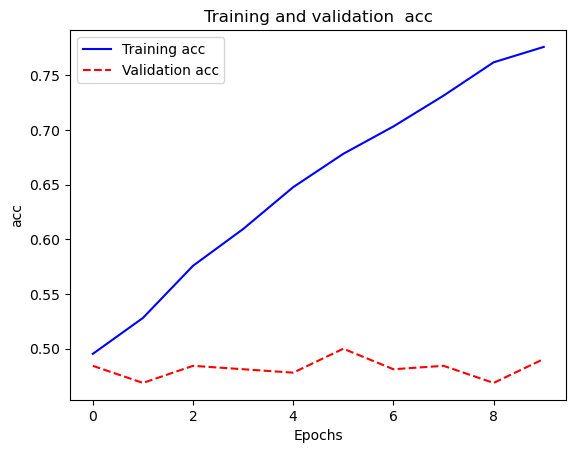

None
13/13 [==============================] - 1s 39ms/step - loss: 0.7007 - acc: 0.4925
#Test accuracy: 0.493)


In [15]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model=Sequential([Embedding(max_words, 32), SimpleRNN(32), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])
model.summary()

adam=Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.2)

print(plot_results(history, 'acc'))

score=model.evaluate(X_test, y_test)
print(f'#Test accuracy: {score[1]:.3f})')